In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Question 1

In [0]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Question 2

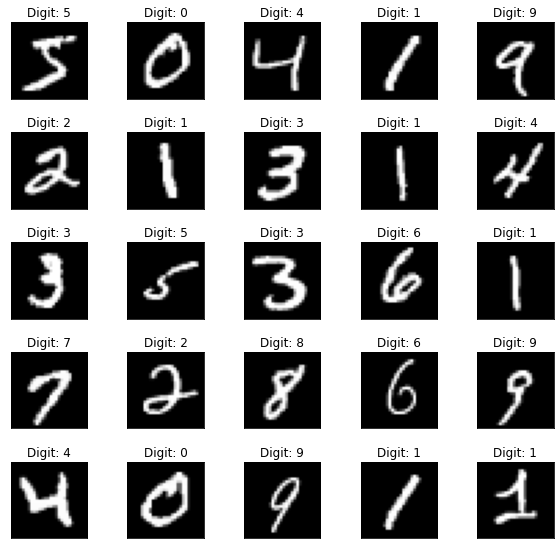

In [0]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation=None)
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

Question 3

In [0]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [0]:
from keras.utils import np_utils
print("class label for first image : {}".format(y_train[0]))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print("After converting class label of first image : {}".format(y_train[0]))

class label for first image : 5
After converting class label of first image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Question 4

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape = (784,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

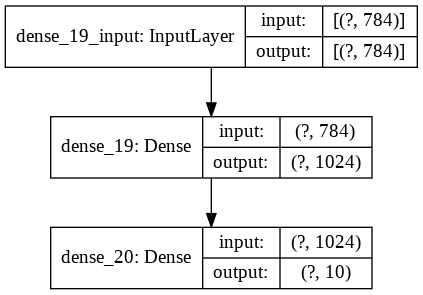

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.fit(X_train, y_train, batch_size=5000, epochs=50)

Epoch 1/50
12/12 [==============================] - 3s 286ms/step - loss: 0.9646 - accuracy: 0.7048
Epoch 2/50
12/12 [==============================] - 3s 285ms/step - loss: 0.4269 - accuracy: 0.8798
Epoch 3/50
12/12 [==============================] - 3s 282ms/step - loss: 0.3534 - accuracy: 0.8977
Epoch 4/50
12/12 [==============================] - 3s 284ms/step - loss: 0.2917 - accuracy: 0.9166
Epoch 5/50
12/12 [==============================] - 3s 285ms/step - loss: 0.2568 - accuracy: 0.9253
Epoch 6/50
12/12 [==============================] - 3s 283ms/step - loss: 0.2240 - accuracy: 0.9352
Epoch 7/50
12/12 [==============================] - 3s 285ms/step - loss: 0.2086 - accuracy: 0.9376
Epoch 8/50
12/12 [==============================] - 3s 285ms/step - loss: 0.1828 - accuracy: 0.9469
Epoch 9/50
12/12 [==============================] - 3s 285ms/step - loss: 0.1724 - accuracy: 0.9488
Epoch 10/50
12/12 [==============================] - 3s 287ms/step - loss: 0.1516 - accuracy: 0.9559

In [0]:
Prediction = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9817


In [0]:
print("Test loss: ",Prediction[0])
print("Test acc: ",Prediction[1])

Test loss:  0.05960763990879059
Test acc:  0.9817000031471252


Question 5

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape = (784,), activation='relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

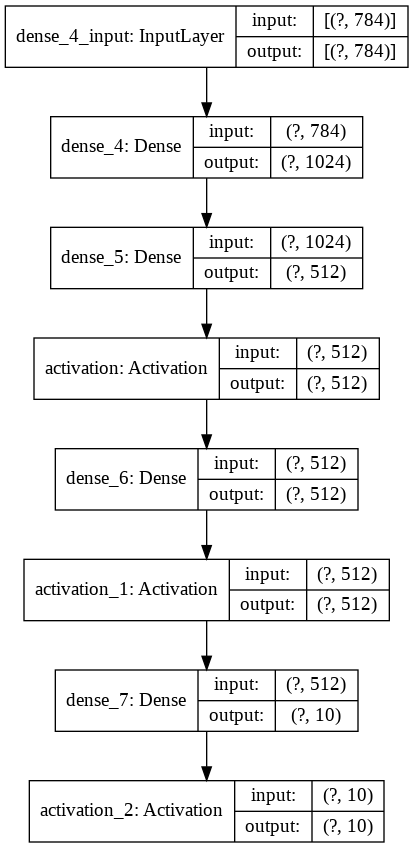

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.fit(X_train, y_train, batch_size=5000, epochs=50)

Epoch 1/50
12/12 [==============================] - 8s 627ms/step - loss: 0.9539 - accuracy: 0.7413
Epoch 2/50
12/12 [==============================] - 7s 624ms/step - loss: 0.3281 - accuracy: 0.9046
Epoch 3/50
12/12 [==============================] - 7s 624ms/step - loss: 0.2169 - accuracy: 0.9363
Epoch 4/50
12/12 [==============================] - 7s 623ms/step - loss: 0.1610 - accuracy: 0.9535
Epoch 5/50
12/12 [==============================] - 7s 623ms/step - loss: 0.1250 - accuracy: 0.9643
Epoch 6/50
12/12 [==============================] - 7s 622ms/step - loss: 0.1007 - accuracy: 0.9709
Epoch 7/50
12/12 [==============================] - 7s 622ms/step - loss: 0.0816 - accuracy: 0.9766
Epoch 8/50
12/12 [==============================] - 7s 622ms/step - loss: 0.0656 - accuracy: 0.9812
Epoch 9/50
12/12 [==============================] - 8s 626ms/step - loss: 0.0538 - accuracy: 0.9849
Epoch 10/50
12/12 [==============================] - 7s 623ms/step - loss: 0.0440 - accuracy: 0.9879

In [0]:
Prediction = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9822


In [0]:
print("Test loss: ",Prediction[0])
print("Test acc: ",Prediction[1])

Test loss:  0.08177915960550308
Test acc:  0.982200026512146


Question 6

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               692352    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

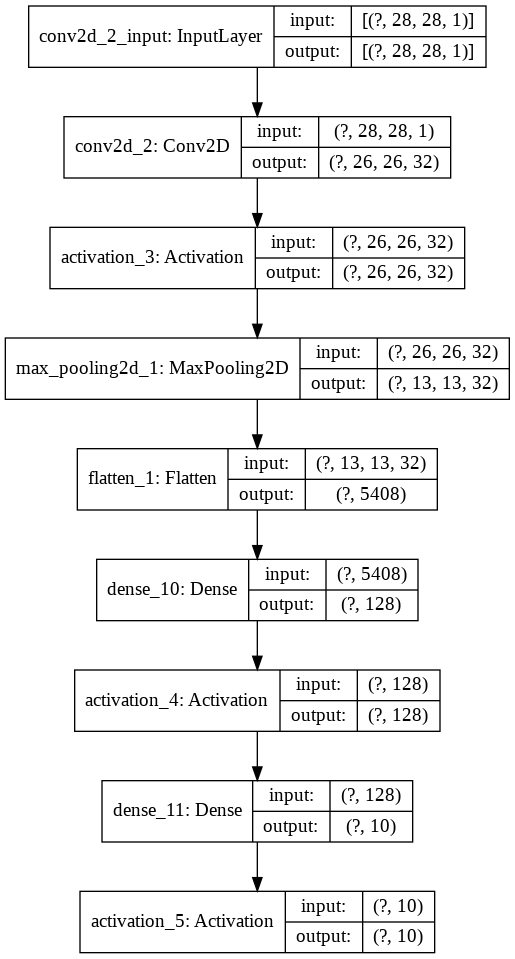

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=5000, epochs=50)

Epoch 1/50
12/12 [==============================] - 18s 1s/step - loss: 1.3297 - accuracy: 0.7033
Epoch 2/50
12/12 [==============================] - 18s 2s/step - loss: 0.4311 - accuracy: 0.8777
Epoch 3/50
12/12 [==============================] - 18s 2s/step - loss: 0.3122 - accuracy: 0.9083
Epoch 4/50
12/12 [==============================] - 18s 1s/step - loss: 0.2612 - accuracy: 0.9237
Epoch 5/50
12/12 [==============================] - 18s 1s/step - loss: 0.2257 - accuracy: 0.9347
Epoch 6/50
12/12 [==============================] - 18s 1s/step - loss: 0.1963 - accuracy: 0.9434
Epoch 7/50
12/12 [==============================] - 18s 2s/step - loss: 0.1718 - accuracy: 0.9511
Epoch 8/50
12/12 [==============================] - 18s 2s/step - loss: 0.1510 - accuracy: 0.9568
Epoch 9/50
12/12 [==============================] - 18s 2s/step - loss: 0.1332 - accuracy: 0.9629
Epoch 10/50
12/12 [==============================] - 18s 2s/step - loss: 0.1190 - accuracy: 0.9669
Epoch 11/50
12/12 [

In [0]:
model_json = model.to_json()
with open("model.json", "w") as file:
    file.write(model_json)

model.save("model.h5")

In [0]:
model = keras.models.load_model('model.h5')
print("Loaded Model from Disk")

Loaded Model from Disk
